# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Predictions Infox - Comparaison Bag of Words

---

### Conseils JW
- Utiliser la courbe de ROC : superposition, et calcul de l'intégrale Area under curve = AUC
- Faire varier le seuil pour accuracy/recall/f1. La courbe de ROC résume tout ça.
- Essayer Naive Bayes avec distribution de Poisson
- Refaire un benchmark
- Faire des opérations de réduction de dimensions SVD sur le BoW `sklearn.decomposition.TruncatedSVD`
- Réseau de neurones : faire petit, metrique AUC
- Word Embedings : https://fasttext.cc/docs/en/crawl-vectors.html


# Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [67]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paramètres globaux

In [3]:
random_state = 42

## Données d'entrainement

In [4]:
df_texts_recueil = pd.read_csv('data/demo/221123-TextInfox.csv')

In [5]:
df_texts_recueil

,url,infox,title,article,text
0,https://actu.fr/faits-divers/quatre-morts-dans...,0.0,Quatre morts dans un accident de la route sur ...,"Quatre personnes sont décédées, et une autre a...",Quatre morts dans un accident de la route sur ...
1,https://www.francetvinfo.fr/economie/budget/co...,0.0,Consommation : les Français boudent les distri...,Les distributeurs de billets vont-ils un jour ...,Consommation : les Français boudent les distri...
2,https://www.francetvinfo.fr/sante/contraceptio...,0.0,Avortement : le choix des Irlandais,"En Irlande, lors du référendum, les électeurs ...",Avortement : le choix des Irlandais\nEn Irland...
3,https://www.francesoir.fr/culture-celebrites/u...,0.0,Une ex de Cristiano Ronaldo compare porno et t...,Elle avait mis un pied dans le monde de la tél...,Une ex de Cristiano Ronaldo compare porno et t...
4,https://www.francesoir.fr/afp-afp-france/levee...,0.0,"Levée du statut de détenu signalé de Colonna, ...",Le Premier ministre Jean Castex a levé mardi l...,"Levée du statut de détenu signalé de Colonna, ..."
...,...,...,...,...,...
606,https://www.wikistrike.com/2022/09/11-septembr...,1.0,11 septembre 2001 : La théorie du « complot pi...,Le 11 septembre pour les nuls\nEst-il vrai que...,11 septembre 2001 : La théorie du « complot pi...
607,https://www.wikistrike.com/2022/10/selon-un-an...,1.0,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...","Selon un ancien conseiller du Pentagone, les É..."
608,https://www.wikistrike.com/2022/10/la-pologne-...,1.0,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,La Pologne s’apprête à s’emparer du territoire...
609,https://www.wikistrike.com/2022/11/exclusivite...,1.0,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",Exclusivité WikiStrike: un physicien en colère...


In [6]:
df_texts_afp =  pd.read_csv('data/tmp/221118-TextsAfp.csv')

In [7]:
df_texts_afp

,url,text,infox
0,https://www.francesoir.fr/politique-monde/pres...,Présidentielle au Brésil: Bolsonaro talonne Lu...,0.0
1,https://www.francesoir.fr/politique-france/la-...,La France lance un plan de sobriété énergétiqu...,0.0
2,https://www.francesoir.fr/politique-monde/mani...,Manifestations des femmes en Iran contre le po...,0.0
3,https://www.francesoir.fr/politique-france/aff...,Affaire Quatennens: LFI sous la pression de la...,0.0
4,https://www.francesoir.fr/politique-monde/covi...,"Covid-19: pour Joe Biden, ""la pandémie est ter...",0.0
...,...,...,...
3232,https://www.francesoir.fr/lifestyle-gastronomi...,La deuxième vie des coquilles d'huîtres\nLes h...,0.0
3233,https://www.francesoir.fr/lifestyle-gastronomi...,La truffe se fait rare\nVictime du réchauffeme...,0.0
3234,https://www.francesoir.fr/lifestyle-gastronomi...,Rungis prépare un Noël opulent malgré les atte...,0.0
3235,https://www.francesoir.fr/lifestyle-gastronomi...,Gastronomie: le Franco-Suisse Benoît Violier m...,0.0


In [8]:
with open('data/tmp/221110-IgnoreLemmas.txt','r') as file:
    ignore_words = file.read().split()

In [9]:
print(ignore_words[:100])
print(len(ignore_words))

['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'du', 'est', 'une', 'que', 'être', 'avoir', 'pour', 'dans', 'qui', 'il', 'par', 'sur', 'au', 'pas', 'ce', 'plaire', 'faire', 'ne', 'qu', 'pouvoir', 'se', 'avec', 'tout', 'ou', 'été', 'son', 'mais', 'aux', 'cette', 'on', 'nous', 'comme', 'elle', 'même', 'autre', 'devoir', 'ces', 'pays', 'leur', 'si', 'sa', 'ses', 'bien', 'état', 'contre', 'ils', 'vous', 'sans', 'voir', 'je', 'après', 'deux', 'depuis', 'mettre', 'russie', 'monde', 'entre', 'grand', 'an', 'dire', 'covid', 'invitant', 'guéguen', 'patiemment', 'méditation', 'eda', 'perdurer', 'inversement', 'guedj', 'penn', 'kang', 'officieux', 'jurisprudence', 'kant', 'hectare', 'islamisation', 'hebdo', 'guichard', 'entente', 'guihard', 'pepe', 'duel', 'haïr', 'naufrage', 'ironiquement', 'olivennes', 'juvénile', 'inégal', 'patois', 'justifiant', 'echos', 'jacky']
15203


In [10]:
df_words = pd.read_csv('data/prod/221125-InfoxWords.csv',index_col=0)

In [11]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,114412,23980,138392,False,False,False,False,False,False,False,True,True,True,True,True
la,63402,12901,76303,False,False,False,False,False,False,False,True,True,True,True,True
le,49361,9921,59282,False,False,False,False,False,False,False,True,True,True,True,True
et,38704,10142,48846,False,False,False,False,False,False,False,True,True,True,True,True
les,38053,10363,48416,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mayr,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
mazari,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
maçonnique,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False
maïté,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False


In [12]:
ignore_words_small = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index)
ignore_words_medium = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index)
ignore_words_large = list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index)

In [13]:
common_80 = list(df_words[df_words['common_80']].index)
common_200 = list(df_words[df_words['common_200']].index)

In [17]:
ignore_words_small.sort
ignore_words_small

['de',
 'la',
 'le',
 'et',
 'les',
 'des',
 'en',
 'un',
 'du',
 'une',
 'avoir',
 'pour',
 'est',
 'dans',
 'être',
 'qui',
 'il',
 'au',
 'que',
 'par',
 'sur',
 'plaire',
 'pas',
 'son',
 'ce',
 'avec',
 'faire',
 'qu',
 'été',
 'se',
 'an',
 'ne',
 'pouvoir',
 'mais',
 'on',
 'aux',
 'elle',
 'cette',
 'sa',
 'ou',
 'ses',
 'tout',
 'comme',
 'après',
 'deux',
 'nous',
 'depuis',
 'autre',
 'je',
 'leur',
 'devoir',
 'grand',
 'dire',
 'même',
 'ces',
 'ils',
 'mettre',
 'entre',
 'contre',
 'voir',
 'si',
 'personne',
 'éradiquerons',
 'pierrefonds',
 'akhmetov',
 'boursicoteur',
 'perfusent',
 'bruna',
 'sheena',
 'bourlieux',
 'pioche',
 'stups',
 'zara',
 'agrocarburants',
 'persan',
 'taron',
 'plos',
 'shebab',
 'series',
 'bouri',
 'zardari',
 'brenne',
 'serin',
 'performé',
 'substitutifs',
 'shtayyeh',
 'shtf',
 'akhoondi',
 'pierrefitte',
 'bright',
 'perichon',
 'brégançon',
 'silvestri',
 'shearwater',
 'silverman',
 'serrat',
 'shalwar',
 'silverio',
 'algarve',
 'bo

In [18]:
len(ignore_words_small)

23803

# Experience
---

## Feature Engineering

### Preprocessor

In [19]:
import patat.util.text

importlib.reload(patat.util.text)
preprocessor = patat.util.text.preprocess
#preprocessor=None

### Tokenizer

In [20]:
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

tokenizer = lex.get_lemmas_from_text

### TfIdfVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#afp_size = 3000
#afp_size = 120
afp_size = 20
#afp_size = 0
df_ml = pd.concat([df_texts_recueil,df_texts_afp.sample(afp_size,random_state=random_state)])

In [23]:
%%time
#vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=[])
vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words_small)
count_matrix = vectorizer.fit_transform(df_ml['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

df_X = df_tf
X = df_X

len(df_X.keys())

/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'accoucher', 'acérer', 'agir', 'attitrer', 'aviser', 'bail', 'bau', 'boire', 'bondir', 'bourrer', 'braiser', 'breveter', 'caractériser', 'chiner', 'circonstancier', 'condenser', 'converger', 'cristalliser', 'différer', 'déclasser', 'déculotter', 'déniveler', 'déplaire', 'désemparer', 'dévoyer', 'escarper', 'estampiller', 'feindre', 'fermenter', 'fermer', 'feuilleter', 'frémir', 'glacer', 'grimacer', 'instruire', 'intoxiquer', 'muqueux', 'nébuleux', 'plafonner', 'rafraîchir', 'ravir', 'redécouvrir', 'rugir', 'réfléchir', 'réformer', 'spécifier', 'stup', 'tracter', 'tripler', 'ébattre', 'échauder', 'étourdir'] not in stop_words.
  warnings.warn(


CPU times: user 464 ms, sys: 12.9 ms, total: 477 ms
Wall time: 479 ms


18990

### Dimension reduction

## Entrainement Sklearn

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
#from sklearn.metrics import roc_curve

In [25]:
#X = df_X
y=df_ml['infox']

In [26]:
df_X.shape

(631, 18990)

### Initialisations

In [27]:
train_size=0.8
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=train_size)

In [28]:
def print_metrics(y_train, y_test, y_pred):
    print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
    print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
    print(f'Accuracy score \t{metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
    print(f'Recall score \t{metrics.recall_score(y_test, y_pred)*100:.2f}%')
    print(f'F1 score \t{metrics.f1_score(y_test, y_pred)*100:.2f}%')
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred,normalize='all')
    print(f'False Positive \t{cnf_matrix[0,1]*100:.2f}%')
    print(f'False Negative \t{cnf_matrix[1,0]*100:.2f}%\n')    

In [60]:
fpr={}
tpr={}
def store_roc(classifier,X_test,y_test):
    clf = type(classifier)
    y_proba = classifier.predict_proba(X_test)
    y_score = y_proba.transpose()[1]
    fpr[clf], tpr[clf], _ = metrics.roc_curve(y_test, y_score)

### Dummy Classifier

In [61]:
from sklearn.dummy import DummyClassifier
#strategies = ['most_frequent', 'prior', 'stratified', 'uniform']
strategies = ['stratified', 'uniform']
for strategy in strategies:
    print('---------------')
    print(f'Strategy : {strategy}\n')
    classifier = DummyClassifier(strategy=strategy, random_state=random_state)
    classifier.fit(X_train, y_train)
    store_roc(classifier,X_test,y_test)
    y_pred = classifier.predict(X_test)
    print_metrics(y_train, y_test, y_pred)

---------------
Strategy : stratified

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	38.58%
Recall score 	33.33%
F1 score 	32.76%
False Positive 	31.50%
False Negative 	29.92%

---------------
Strategy : uniform

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	45.67%
Recall score 	54.39%
F1 score 	47.33%
False Positive 	33.86%
False Negative 	20.47%



In [66]:
tpr

{sklearn.dummy.DummyClassifier: array([0., 1.]),
 sklearn.linear_model._logistic.LogisticRegression: array([0.        , 0.10526316, 0.22807018, 0.22807018, 0.24561404,
        0.24561404, 0.26315789, 0.26315789, 0.29824561, 0.29824561,
        0.38596491, 0.38596491, 0.50877193, 0.50877193, 0.56140351,
        0.56140351, 0.57894737, 0.57894737, 0.71929825, 0.71929825,
        0.75438596, 0.75438596, 0.78947368, 0.78947368, 0.80701754,
        0.80701754, 0.84210526, 0.84210526, 0.85964912, 0.85964912,
        0.87719298, 0.87719298, 0.92982456, 0.92982456, 0.94736842,
        0.94736842, 0.96491228, 0.96491228, 1.        , 1.        ])}

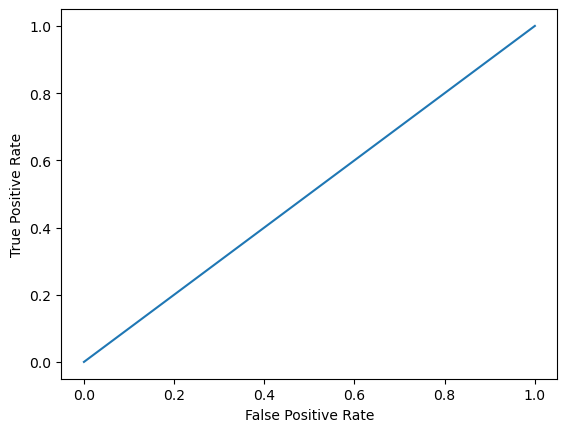

In [41]:
y_proba = classifier.predict_proba(X_test)
y_score = y_proba.transpose()[1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### LogisticRegression

In [64]:
max_iter=500
#C=0.40
C=100
solver = 'lbfgs'

In [65]:
%%time
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
store_roc(classifier,X_test,y_test)
print(classifier)
print()
print_metrics(y_train, y_test, y_pred)

LogisticRegression(C=100, max_iter=500, random_state=42)

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	75.59%
Recall score 	71.93%
F1 score 	72.57%
False Positive 	11.81%
False Negative 	12.60%

CPU times: user 6.05 s, sys: 4.71 s, total: 10.8 s
Wall time: 1.46 s


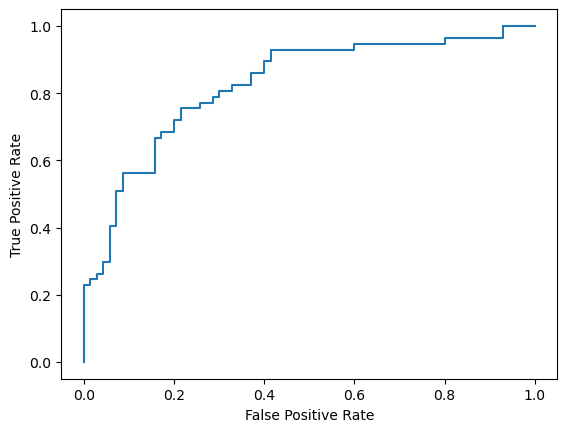

In [35]:
y_proba = classifier.predict_proba(X_test)
y_score = y_proba.transpose()[1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [32]:
# Cross validation
max_iter=500
#C=0.40
C=1000
solver = 'lbfgs'
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
scoring = ['accuracy','recall','f1','roc_auc']
scores = cross_validate(classifier, X, y, cv=5,scoring=scoring)
for score in scores:
    print(score)
    print(scores[score])
    print(f'Mean : {scores[score].mean()} - Deviation : {scores[score].std()}')
#    print(f'Mean : {scores[score].mean()*100:.2f}%')
#    print(f'Deviation : {scores[score].std()*100:.2f}%')


fit_time
[0.65371299 0.71556306 0.74399996 0.70372581 0.72250509]
Mean : 0.7079013824462891 - Deviation : 0.03009616010236411
score_time
[0.13597918 0.12902093 0.13222575 0.12458587 0.14453912]
Mean : 0.13327016830444335 - Deviation : 0.006765971789130732
test_accuracy
[0.70866142 0.71428571 0.78571429 0.57936508 0.6984127 ]
Mean : 0.6972878390201226 - Deviation : 0.06655007900103854
test_recall
[0.73333333 0.57627119 0.88333333 0.55       0.53333333]
Mean : 0.6552542372881355 - Deviation : 0.1343859389232855
test_f1
[0.704      0.65384615 0.79699248 0.55462185 0.62745098]
Mean : 0.6673822928361628 - Deviation : 0.08078652354391885
test_roc_auc
[0.7699005  0.77940804 0.83914141 0.61388889 0.75984848]
Mean : 0.7524374659828745 - Deviation : 0.07456617948999769


### MLPClassifier

In [36]:
alpha=1e-4
hidden_layer_sizes=(8,8)
solver = 'adam'
solvers = ['lbfgs', 'sgd', 'adam']


In [37]:
%%time

classifier = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
print()
print_metrics(y_train, y_test, y_pred)

MLPClassifier(hidden_layer_sizes=(8, 8), random_state=42)

Train size 	504 = 262 False + 242 True
Test size 	127 = 70 False + 57 True

Accuracy score 	79.53%
Recall score 	78.95%
F1 score 	77.59%
False Positive 	11.02%
False Negative 	9.45%

CPU times: user 19.6 s, sys: 1.23 s, total: 20.8 s
Wall time: 2.32 s


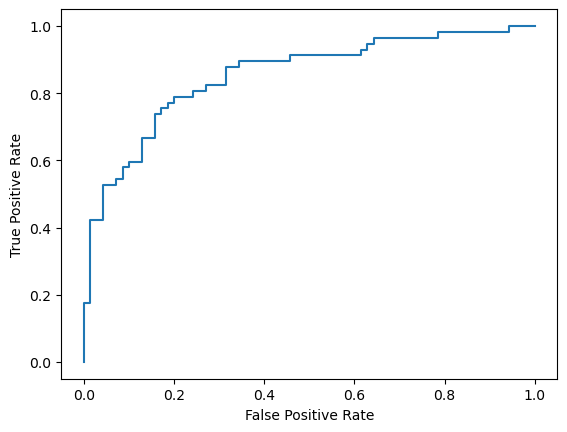

In [38]:
y_proba = classifier.predict_proba(X_test)
y_score = y_proba.transpose()[1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [54]:
%%time
classifier = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)
scoring = ['accuracy','recall','f1','roc_auc']
scores = cross_validate(classifier, X, y, cv=5,scoring=scoring)
for score in scores:
    print(score)
    print(scores[score])
    print(f'Mean : {scores[score].mean()} - Deviation : {scores[score].std()}')
#    print(f'Mean : {scores[score].mean()*100:.2f}%')
#    print(f'Deviation : {scores[score].std()*100:.2f}%')

/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


fit_time
[0.26115203 0.32106996 0.27673173 0.44110537 0.28300524]
Mean : 0.31661286354064944 - Deviation : 0.06529032136096657
score_time
[0.00466299 0.00470996 0.0043211  0.00499892 0.00497389]
Mean : 0.004733371734619141 - Deviation : 0.0002465102101029114
test_accuracy
[0.52755906 0.53968254 0.6031746  0.52380952 0.57142857]
Mean : 0.5531308586426696 - Deviation : 0.030112116347816836
test_recall
[0.56666667 0.47457627 0.6        0.55       0.46666667]
Mean : 0.5315819209039547 - Deviation : 0.05237333845082376
test_f1
[0.53125    0.49122807 0.59016393 0.52380952 0.50909091]
Mean : 0.5291084875004202 - Deviation : 0.03345463242479076
test_roc_auc
[0.57885572 0.57450038 0.66489899 0.54292929 0.62348485]
Mean : 0.5969338464329611 - Deviation : 0.04259292730229976
CPU times: user 14.6 s, sys: 792 ms, total: 15.4 s
Wall time: 1.62 s


/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Keras

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(random_state)

In [ ]:
learn_size=0.90
X_learn,X_valid,y_learn,y_valid = train_test_split(X_train,y_train,random_state=random_state,train_size=learn_size)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),    
    layers.GaussianDropout(0.40, seed=random_state),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(X.shape[1]),    
    layers.Dropout(0.40, seed=random_state),
    layers.Dense(8, activation='relu'),
#    layers.Dense(8, activation='relu'),    
    layers.Dropout(0.40, seed=random_state),
#    layers.Dense(8, activation='relu'),
#    layers.Dropout(0.40, seed=random_state),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
#    metrics=['binary_accuracy'],
    metrics=[tf.keras.metrics.AUC()],
    
)

In [ ]:
%%time
epoch = 10

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = model.fit(
#    X_train.to_numpy(), y_train.to_numpy(),
#    validation_split=0.2,
    X_learn.to_numpy(), y_learn.to_numpy(),
    validation_data=(X_valid.to_numpy(), y_valid.to_numpy()),
    batch_size=24,
    epochs=epoch,
#    callbacks=[early_stopping],
    shuffle=True,
)

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['auc_1', 'val_auc_1']].plot(title="AUC")#history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
#history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")#history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")








In [ ]:
history_df

In [ ]:
y_pred = model.predict(X_test.to_numpy())
y_pred = y_pred.round()
print(model)
print()
print_metrics(y_train, y_test, y_pred)

In [ ]:
model.summary()

# Sauvegarde des résultats
---

# Conclusions
---

- 

# Bricolages
---

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
tf.config.list_physical_devices()

In [ ]:
tf.device("/CPU:0")

In [ ]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

In [ ]:
tf.debugging.set_log_device_placement(True)

In [ ]:
tf.config.list_physical_devices('GPU')

In [59]:
df_words['word']=df_words.index

In [60]:
df_words['c_count']=df_words['word'].apply(len)

In [62]:
df_words.sort_values('c_count',ascending=False).head(30)

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500,word,c_count
blogfacebooktwitteremailtelegramwhatsappviberwordpressgmailvkmessengerlinkedin,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,blogfacebooktwitteremailtelegramwhatsappviberw...,78
idéologiereligiontechnologiefactualitéidéologiel,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,idéologiereligiontechnologiefactualitéidéologiel,48
datepaysrégionmortsblessésdescriptiontotal,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,datepaysrégionmortsblessésdescriptiontotal,42
grassleyjohnsontoweissonhunterbiden,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,grassleyjohnsontoweissonhunterbiden,35
islamiquesafghanistanbadakhshan,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,islamiquesafghanistanbadakhshan,31
racontentafghanistankabulselon,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,racontentafghanistankabulselon,30
pakhtunkhwapakistanbalochistan,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,pakhtunkhwapakistanbalochistan,30
télévisionafghanistanlogardes,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,télévisionafghanistanlogardes,29
commentetreunefemmeenligneje,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,commentetreunefemmeenligneje,28
bundesgesundheitsministerium,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False,bundesgesundheitsministerium,28


In [52]:
classifier.strategy

'stratified'

In [57]:
str(type(classifier))

"<class 'sklearn.dummy.DummyClassifier'>"